In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_image(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [3]:
def print_hist(img, name):
    plt.hist(np.array(img).ravel(), bins=256, range=[0, 256])
    plt.title(f'Histogram of {name}')
    plt.show()

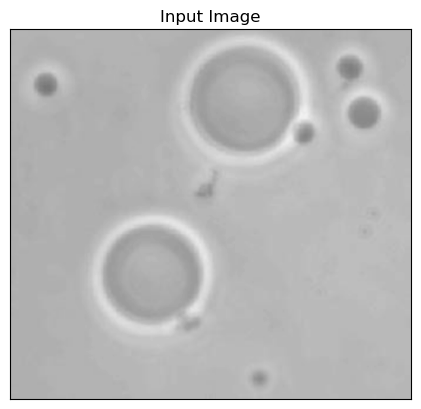

In [4]:
im = cv2.imread('otsustest.png', 0)

show_image(im, 'Input Image')

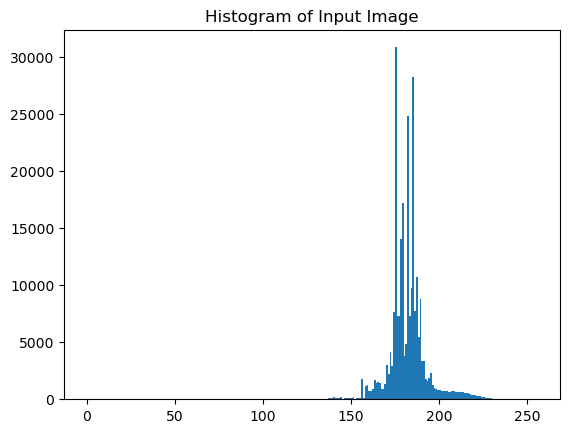

In [5]:
print_hist(im, 'Input Image')

In [6]:
def apply_binary(img, T):
    img = np.array(img)
    out_img = np.zeros_like(img)
    r, c = img.shape
    
    for i in range(r):
        for j in range(c):
            if img[i, j] > T:
                out_img[i, j] = 255
    
    return out_img

In [7]:
def otsus_thresh(img):
    hist = np.histogram(np.array(img), bins=255, range=[0, 255])[0]
    norm_hist = hist / np.sum(hist)
    cumulative_sums = np.cumsum(norm_hist)
    cumulative_means = np.zeros_like(norm_hist)
    for i in range(1, 255):
        cumulative_means[i] = cumulative_means[i-1] + norm_hist[i] * i
    mg = cumulative_means[-1]    
    btw_class_var = np.zeros_like(norm_hist)
    for i in range(1, 255):
        if cumulative_sums[i] == 0 or cumulative_sums[i] == 1:
            continue
        btw_class_var[i] = (mg * cumulative_sums[i] - cumulative_means[i]) ** 2 / (cumulative_sums[i] * (1 - cumulative_sums[i]))
    k_star = np.argmax(btw_class_var)
    
    sigmag_sq = 0
    for i in range(255):
        sigmag_sq += (i - mg) ** 2 * norm_hist[i]
    
    eta_star = btw_class_var[k_star] / sigmag_sq 
    
    return k_star, eta_star 

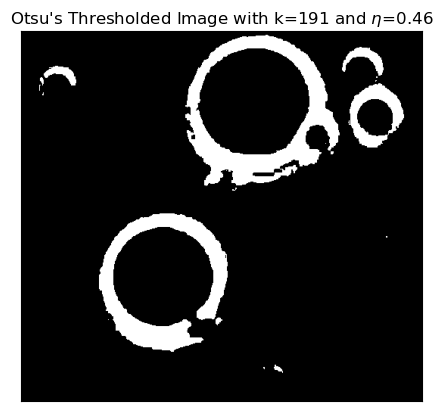

In [8]:
k, eta = otsus_thresh(im)
out_img = apply_binary(im, k)
show_image(out_img, f'Otsu\'s Thresholded Image with k={k} and $\eta$={round(eta, 2)}')